In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [94]:
train_dataset = pd.read_csv('data/train.csv')

In [7]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


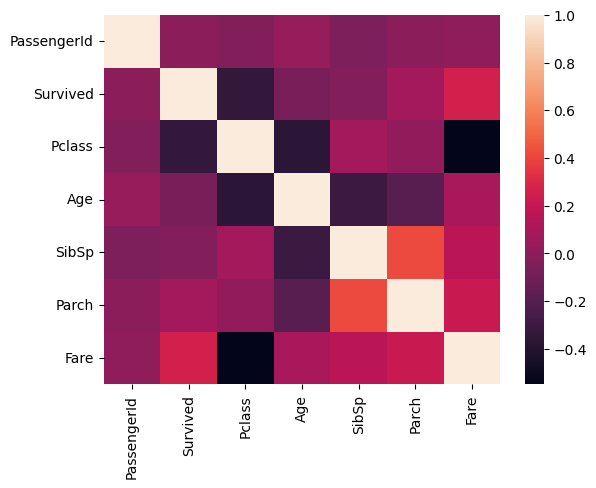

In [88]:
sns.heatmap(train_dataset.corr('pearson', numeric_only=True))
plt.show()

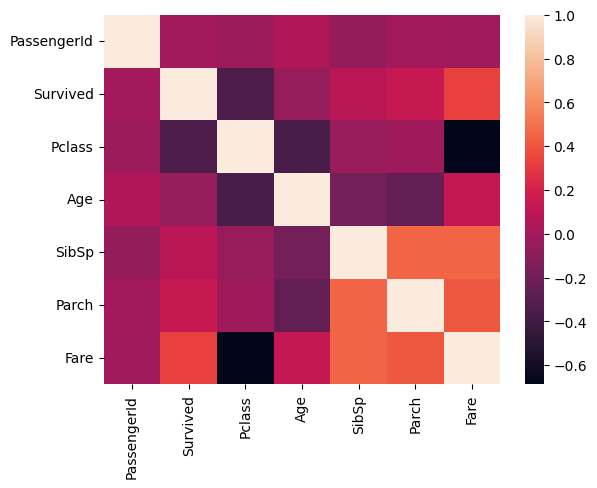

In [89]:
sns.heatmap(train_dataset.corr('spearman', numeric_only=True))
plt.show()

In [95]:
features = train_dataset.loc[:, train_dataset.columns.drop('Survived')]
target = train_dataset.loc[:, 'Survived']

In [77]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_ind, val_ind in split.split(features, target):
    X_train = features.loc[train_ind]
    y_train = target.loc[train_ind]
    X_val = features.loc[val_ind]
    y_val = target.loc[val_ind]

In [78]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((712, 11), (712,), (179, 11), (179,))

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    
    def fit(self, X: pd.DataFrame, y=None):
        return self
    
    def transform(self, X: pd.DataFrame):
        # drop
        X.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)
        
        # impute missing
        numeric_cols = strat_X_train.dtypes != 'object'
        X.loc[:, numeric_cols].fillna(value=-999, inplace=True)
        X.loc[:, ~numeric_cols].fillna(value='-999', inplace=True)
        
        # transform 'Cabin'
        self.unique_letters = np.unique(X.loc[:, 'Cabin'].apply(lambda x: str(x)[0]))
        X['Cabin'] = X.loc[:, 'Cabin'].apply(lambda x: str(x)[0])
                
        return X

In [97]:
from sklearn.pipeline import Pipeline

preprocessing_pipe = Pipeline(steps=[
    ('custom_preprocessing', CustomPreprocessor()),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [81]:
X_train = preprocessing_pipe.fit_transform(X_train)
X_val = preprocessing_pipe.transform(X_val)

C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, numeric_cols].fillna(value=-999, inplace=True)
C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, ~numeric_cols].fillna(value='-999', inplace=True)
C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

cv_params = {'n_estimators': [100, 250, 500, 750],
             'max_depth': [10, 25, 50],
             'min_samples_leaf': [1, 5, 10, 15]}
grid = GridSearchCV(RandomForestClassifier(), cv_params, scoring='accuracy', cv=5, verbose=2)

In [85]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=500; total time=   1.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 25, 50],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy', verbose=2)

In [86]:
grid.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=500)

In [87]:
grid.score(X_val, y_val)

0.8156424581005587

In [99]:
features = preprocessing_pipe.fit_transform(features)

C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, numeric_cols].fillna(value=-999, inplace=True)
C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, ~numeric_cols].fillna(value='-999', inplace=True)


In [100]:
grid.fit(features, target)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.9s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.8s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.7s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.7s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=250; total time=   0.7s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=500; total time=   1.8s
[CV] END .max_depth=10, min_samples_leaf=1, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 25, 50],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'n_estimators': [100, 250, 500, 750]},
             scoring='accuracy', verbose=2)

In [101]:
grid.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=250)

In [102]:
final_rfc = grid.best_estimator_
final_rfc.fit(features, target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [108]:
test_dataset = pd.read_csv('data/test.csv')
X_test = test_dataset.copy()
X_test = preprocessing_pipe.transform(X_test)

C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, numeric_cols].fillna(value=-999, inplace=True)
C:\Users\deniskirbaba\AppData\Local\Temp\ipykernel_13608\87584571.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, ~numeric_cols].fillna(value='-999', inplace=True)
c:\Program Files\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [109]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
submission = pd.DataFrame()
submission['PassengerId'] = test_dataset.loc[:, 'PassengerId']
submission['Survived'] = final_rfc.predict(X_test)

In [111]:
submission.to_csv('submissions/rfc_2.csv', index=False)